# Car Price Prediction

- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

In [1]:
# Import libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the dataset
cars = pd.read_csv("Car_Assignment.csv")

In [3]:
# summary of the dataset: 205 rows, 26 columns, no null values
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# head
cars.head()

,Unnamed: 0,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,0,1,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,1,2,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,2,3,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,3,4,2,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,4,5,2,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Understanding the Data Dictionary

In [7]:
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [8]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [9]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


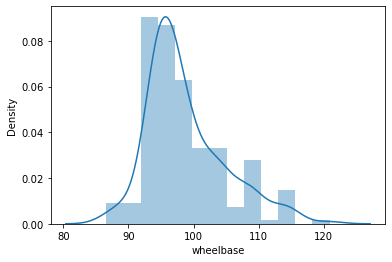

In [10]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


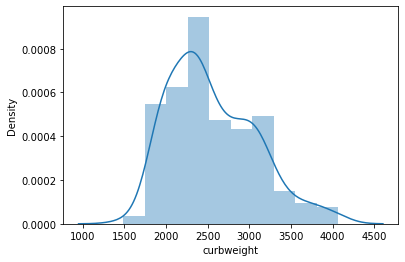

In [11]:
sns.distplot(cars['curbweight'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


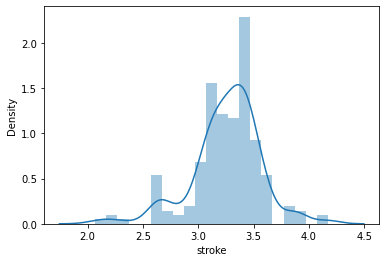

In [12]:
sns.distplot(cars['stroke'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


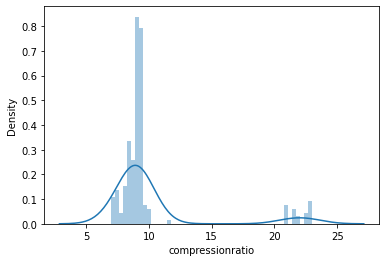

In [13]:
sns.distplot(cars['compressionratio'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


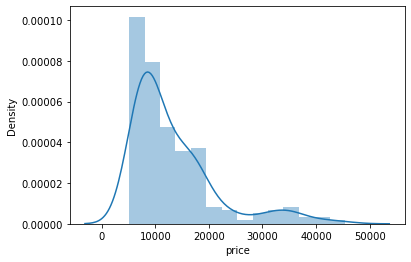

In [14]:
sns.distplot(cars['price'])
plt.show()

### Data Exploration

In [15]:
cars_numeric = cars.select_dtypes(include=['float64', 'int'])
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0


In [16]:
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.488750,0.160959,0.249786,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.606454,0.129533,0.158414,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.559150,0.182942,0.181129,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.171071,-0.055307,0.261214,0.119336
boreratio,0.488750,0.606454,0.559150,0.171071,1.000000,-0.055909,0.005197,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,-0.055909,1.000000,0.186110,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.005197,0.186110,1.000000,0.067984
price,0.577816,0.682920,0.759325,0.119336,0.553173,0.079443,0.067984,1.000000


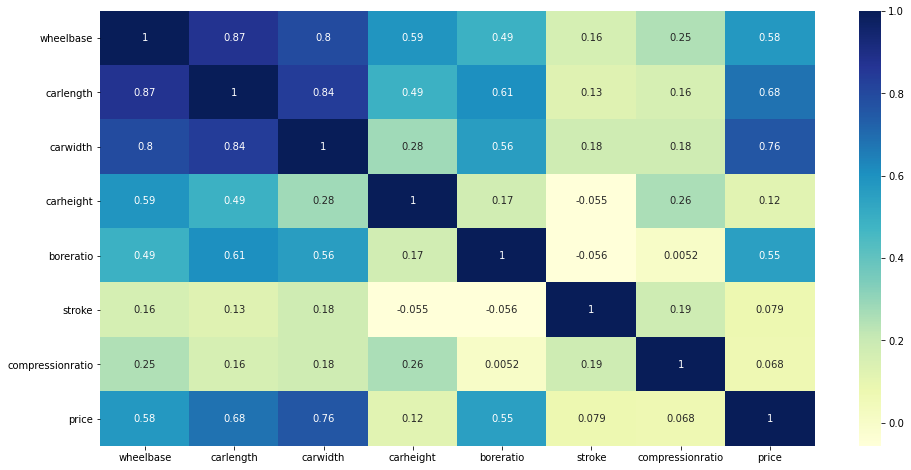

In [17]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### 2. Data Cleaning

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
# converting symboling to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
# outliers
cars.describe()

,Unnamed: 0,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,0.000000,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,102.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,153.000000,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,204.000000,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### 3. Data Preparation 

In [22]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']


In [23]:
# creating dummy variables for categorical variables

# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [24]:
# convert into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [27]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [46]:
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


In [47]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       ...
       'car_company_nissan', 'car_company_peugeot', 'car_company_plymouth',
       'car_company_porsche', 'car_company_renault', 'car_company_saab',
       'car_company_subaru', 'car_company_toyota', 'car_company_volkswagen',
       'car_company_volvo'],
      dtype='object', length=123)

In [65]:
# split into train and test

from sklearn.model_selection import train_test_split


In [54]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

In [59]:
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (164, 123)
shape of y_train =  (164,)
shape of X_test =  (41, 123)
shape of y_test =  (41,)


### 3. Model Building and Evaluation

In [80]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [81]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression()

In [82]:
# print coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 8.15239329e+02 -1.21610263e+03  1.85368904e+03 -9.03533050e+02
  3.42308239e+03  3.59629374e+03 -1.06281193e+03 -1.19969505e+02
 -2.38048772e+03 -1.50439470e+02  9.99303879e+02 -1.75649530e+02
  5.29244679e+02 -4.35397047e+15  7.53523390e+14  3.89752061e+15
  1.73944327e+16  2.71365192e+15 -2.55958525e+15  2.48904304e+14
 -5.14306920e+14  8.36434272e+15 -7.16858592e+14 -4.34001239e+14
 -5.53354536e+14  9.18723267e+14  2.93372168e+15 -6.39637912e+14
  6.81420036e+13  3.03368655e+15  7.65414083e+14 -2.26589614e+15
 -2.23851982e+15  1.12168540e+15 -9.14637526e+13  1.08002860e+15
 -2.45544936e+14  2.33072199e+14  1.63231324e+15 -5.86581950e+14
 -2.84962789e+15 -1.61311168e+15 -1.68271106e+15  1.70092362e+15
  5.38309669e+13 -7.15309454e+13  2.33895894e+15 -4.30347577e+14
  1.47713283e+14  3.90999191e+14  1.03932486e+15  4.80973843e+14
  2.80605795e+14 -2.08166059e+14  2.18480007e+13 -3.75706113e+14
 -2.73291093e+14 -4.54679153e+13 -2.96058932e+13 -1.70449846e+15
  2.41783503e+14  4.42013

In [83]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.9206613874378429


In [84]:
0.9206613874378429*100

92.0661387437843

In [92]:
y_pred

array([24020.81009336, 24020.81009336, 13570.30749205, 24020.81009336,
        7586.4349298 , 13570.30749205, 13570.30749205, 13718.46826226,
       33356.25065033,  7586.4349298 ,  7586.4349298 ,  7586.4349298 ,
       13570.30749205,  7586.4349298 ,  7586.4349298 , 24020.81009336,
        7586.4349298 ,  7586.4349298 , 24168.97086356,  7586.4349298 ,
       13570.30749205,  7586.4349298 , 24168.97086356, 24020.81009336,
       13570.30749205, 13570.30749205, 13570.30749205,  7586.4349298 ,
       13570.30749205, 13570.30749205, 24020.81009336,  7586.4349298 ,
       13570.30749205,  7586.4349298 , 13570.30749205,  7586.4349298 ,
       13570.30749205, 13570.30749205, 13718.46826226, 24020.81009336,
       24020.81009336])